In [1]:
import cirq
import numpy as np

In [2]:
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from cirq.ops import CZ, H, X, CX

In [3]:
access_token = '2633b2d14dae4d9da7c9df2503857334'

In [4]:
device, qubits = get_aqt_device(2)
print(device)

0───1


In [5]:
circuit = cirq.Circuit(device=device)
circuit.append([cirq.H(qubits[0])])
circuit.append([cirq.H(qubits[1])])
#circuit.append([cirq.CNOT(qubits[1], qubits[0])])
device.validate_circuit(circuit)
print(circuit, qubits)

0: ───Rx(π)───Ry(-0.5π)───

1: ───Rx(π)───Ry(-0.5π)─── [cirq.LineQubit(0), cirq.LineQubit(1)]


In [6]:
url = 'https://gateway.aqt.eu/marmot/sim/'
aqt_sampler = AQTSampler(url, access_token=access_token)
aqt_sweep = aqt_sampler.run(circuit, repetitions=40)

In [7]:
print(aqt_sweep)
a = getattr(aqt_sweep, 'measurements')
#print(a)
b = a["m"]+0
a["m"]=b
print(a)
print(b.tolist().count([0,1]))

m=0111111111111111011111001011111111111111, 0110111100000110001001000011111111101011
{'m': array([[0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1]])}
0


Counter({(3,): 22, (2,): 13, (0,): 5})


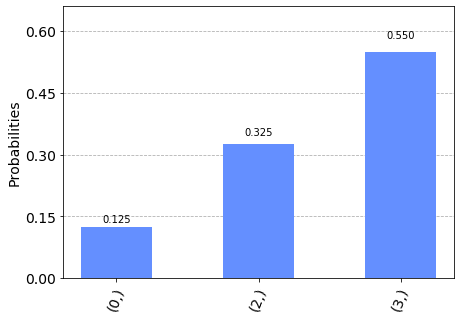

In [8]:
#cirq.plot_state_histogram(aqt_sweep)
counts = cirq.TrialResult.multi_measurement_histogram(aqt_sweep,keys=['m'])
print(counts)
plot_histogram(counts)